In [44]:
import numpy as np
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from matplotlib.colors import LinearSegmentedColormap


In [33]:
df = pd.read_csv("cardio_train.csv", sep = ";", index_col="id")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


(70000, 12)

In [ ]:
df["age_year"] = df["age"] / 365
df = df.drop(columns=["age"])

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
 11  age_year     70000 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 6.9 MB


In [36]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.339358
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.759594
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.394521
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.980822
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.430137
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123


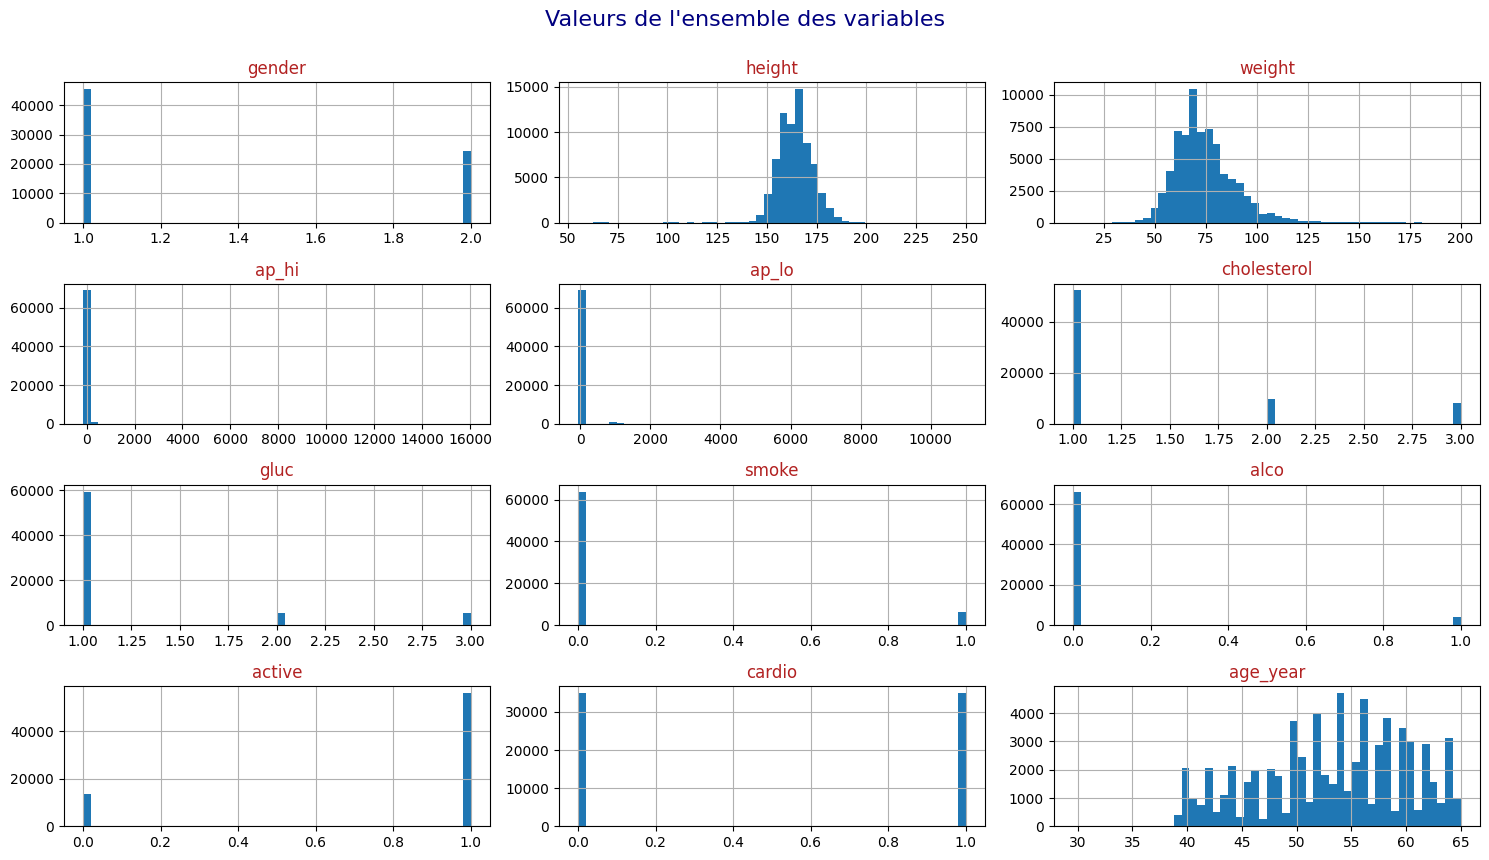

In [37]:
axes = df.hist(bins=50, figsize=(15,9))
plt.suptitle("Valeurs de l'ensemble des variables", fontsize=16, color="navy")
# Modifier la couleur des titres individuels
for ax in axes.ravel():  # ravel() aplatit la grille d'axes
    ax.set_title(ax.get_title(), color='firebrick')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

Text(0.5, 1.0, 'Matrice de corrélation')

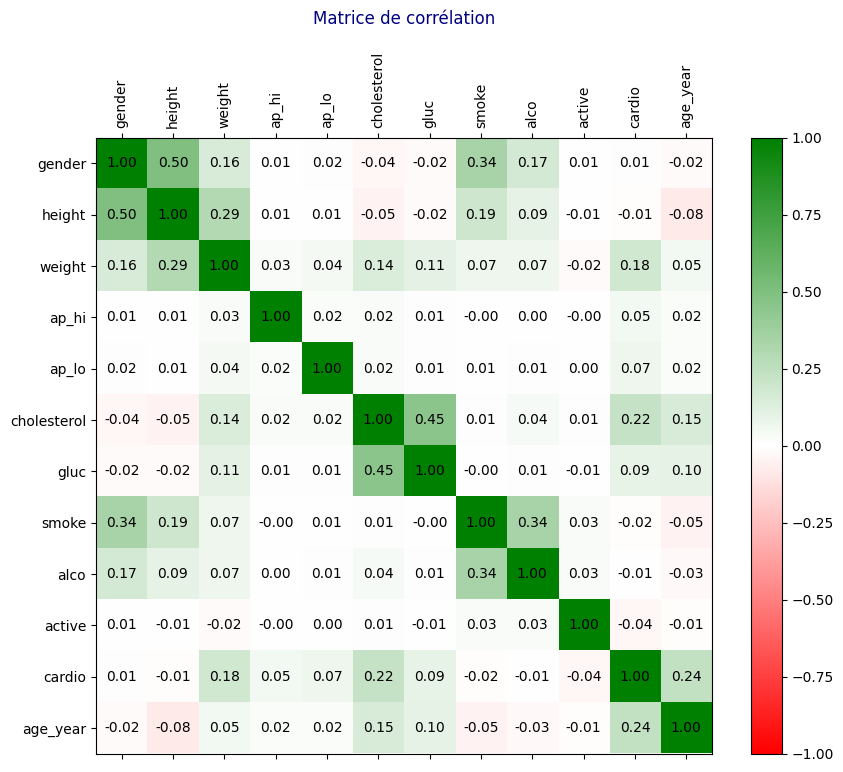

In [46]:
# Création d'une colormap rouge → blanc → vert
cmap = LinearSegmentedColormap.from_list("red_green", ["red", "white", "green"], N=256)

corr = df.corr()

# Tracé de la matrice
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap=cmap, vmin=-1, vmax=1)

# Axes et titre
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Matrice de corrélation", pad=20)
plt.colorbar(cax)

# Ajouter les valeurs dans chaque case
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

plt.title("Matrice de corrélation", pad=20, color="navy")
# plt.show()

In [43]:
print (corr)

               gender    height    weight     ap_hi     ap_lo  cholesterol  \
gender       1.000000  0.499033  0.155406  0.006005  0.015254    -0.035821   
height       0.499033  1.000000  0.290968  0.005488  0.006150    -0.050226   
weight       0.155406  0.290968  1.000000  0.030702  0.043710     0.141768   
ap_hi        0.006005  0.005488  0.030702  1.000000  0.016086     0.023778   
ap_lo        0.015254  0.006150  0.043710  0.016086  1.000000     0.024019   
cholesterol -0.035821 -0.050226  0.141768  0.023778  0.024019     1.000000   
gluc        -0.020491 -0.018595  0.106857  0.011841  0.010806     0.451578   
smoke        0.338135  0.187989  0.067780 -0.000922  0.005186     0.010354   
alco         0.170966  0.094419  0.067113  0.001408  0.010601     0.035760   
active       0.005866 -0.006570 -0.016867 -0.000033  0.004780     0.009911   
cardio       0.008109 -0.010821  0.181660  0.054475  0.065719     0.221147   
age_year    -0.022811 -0.081515  0.053684  0.020764  0.017647   

np.float64(0.4257248218709485)

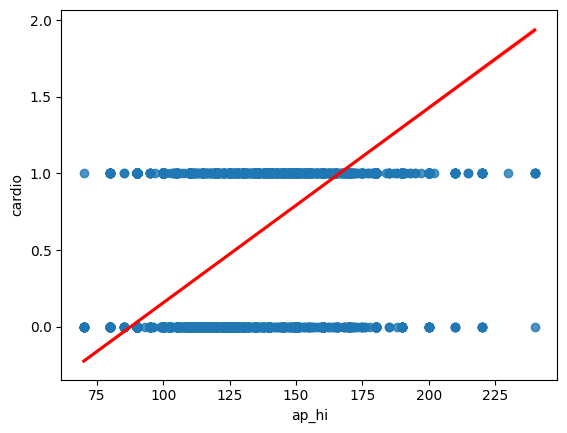

In [49]:
sns.regplot(x=df['ap_hi'], y=df['cardio'], line_kws={"color": "red"} )
df['ap_hi'].corr(df['cardio'])

np.float64(0.33741852644491266)

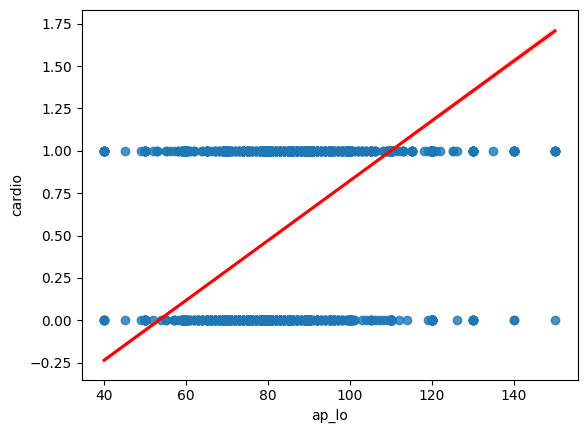

In [50]:
sns.regplot(x=df['ap_lo'], y=df['cardio'], line_kws={"color": "red"} )
df['ap_lo'].corr(df['cardio'])

np.float64(0.23955819420950164)

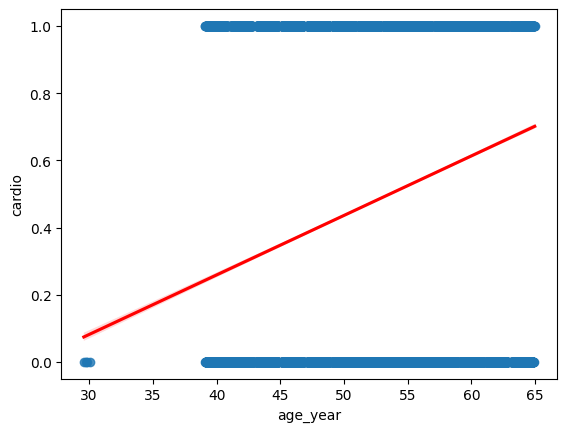

In [51]:
sns.regplot(x=df['age_year'], y=df['cardio'], line_kws={"color": "red"} )
df['age_year'].corr(df['cardio'])

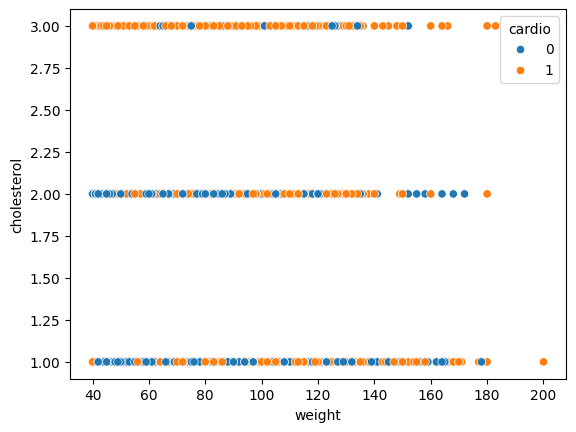

In [52]:
sns.scatterplot(data=df, x='weight', y='cholesterol', hue='cardio')
plt.show()

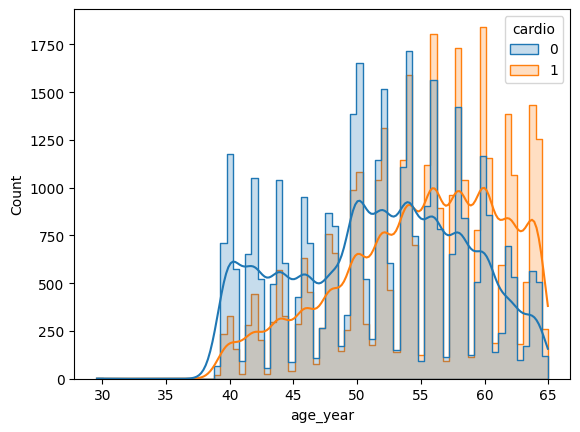

In [53]:
sns.histplot(data=df, x='age_year', hue='cardio', kde=True, element='step', stat='count', common_norm=False)
plt.show()


<Axes: xlabel='age_year', ylabel='Count'>

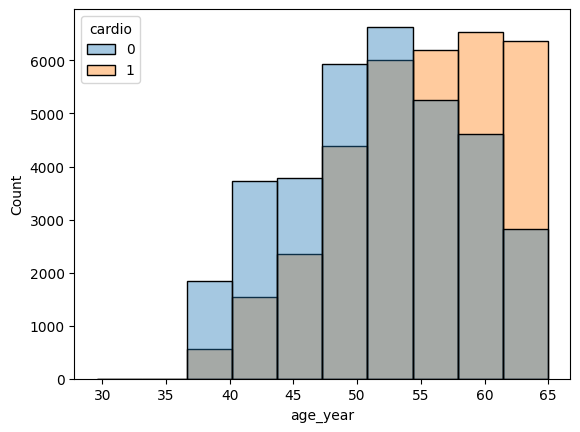

In [54]:
sns.histplot(
    data=df,
    x='age_year',
    hue='cardio',
    bins=10,
    multiple='layer',  # empile les deux couleurs légèrement
    alpha=0.4,          # transparence pour voir les deux
    stat='count'        # on affiche les quantités réelles
)

<Axes: xlabel='weight', ylabel='Count'>

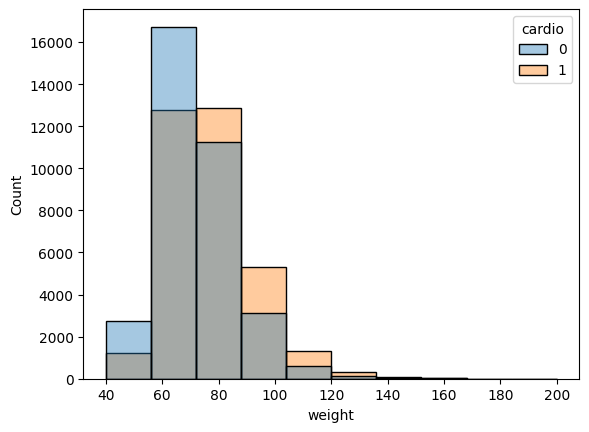

In [55]:
sns.histplot(
    data=df,
    x='weight',
    hue='cardio',
    bins=10,
    multiple='layer',  # empile les deux couleurs légèrement
    alpha=0.4,          # transparence pour voir les deux
    stat='count'        # on affiche les quantités réelles
)

<Axes: xlabel='ap_lo', ylabel='Count'>

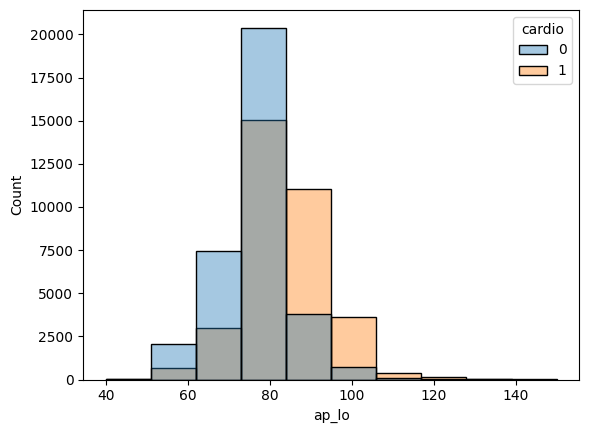

In [56]:
sns.histplot(
    data=df,
    x='ap_lo',
    hue='cardio',
    bins=10,
    multiple='layer',  
    alpha=0.4,        
    stat='count'        
)

<Axes: xlabel='ap_hi', ylabel='Count'>

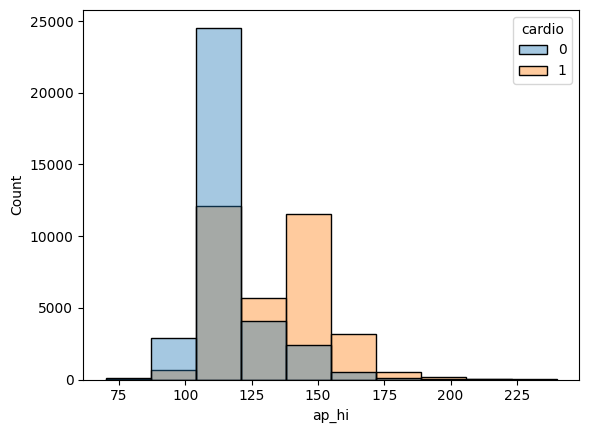

In [57]:
sns.histplot(
    data=df,
    x='ap_hi',
    hue='cardio',
    bins=10,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)

<Axes: xlabel='cholesterol', ylabel='Count'>

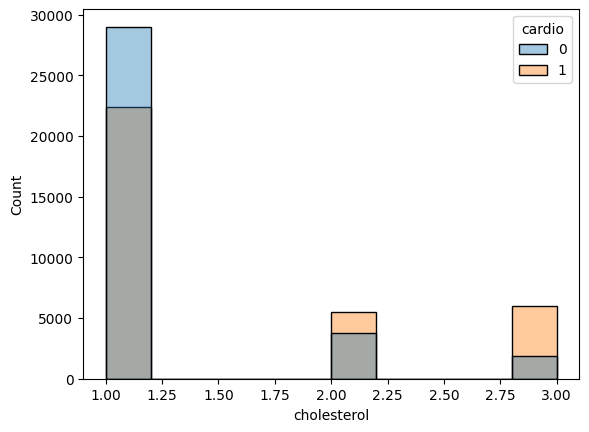

In [58]:
sns.histplot(
    data=df,
    x='cholesterol',
    hue='cardio',
    bins=10,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)

In [59]:
sns.histplot(
    data=df,
    x='',
    hue='cardio',
    bins=10,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)

ValueError: Could not interpret value `` for `x`. An entry with this name does not appear in `data`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
X = df[["age_year", "gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active"]] 
y = df["cardio"] 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification:\n", classification_report(y_test, y_pred))


Accuracy: 0.7301101144899
Matrice de confusion:
 [[5449 1500]
 [2201 4563]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.71      0.78      0.75      6949
           1       0.75      0.67      0.71      6764

    accuracy                           0.73     13713
   macro avg       0.73      0.73      0.73     13713
weighted avg       0.73      0.73      0.73     13713



In [ ]:


# Modèle avec hyperparamètres modifiés
model = LogisticRegression(
    C=0.5,                  # pénalise un peu plus (par défaut c’est 1.0)
    penalty='l2',           # régularisation L2
    solver='saga',         # optimiseur recommandé pour les petits jeux de données
    max_iter=1000,
    class_weight='balanced'  # utile si la classe 1 est très minoritaire
)

model.fit(X_train, y_train)


/Users/sulivanmoreau/La_plateforme/cardio-vasc-risks/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000, solver='saga')

In [ ]:
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification:\n", classification_report(y_test, y_pred))


Accuracy: 0.7238386932108218
Matrice de confusion:
 [[5334 1615]
 [2172 4592]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      6949
           1       0.74      0.68      0.71      6764

    accuracy                           0.72     13713
   macro avg       0.73      0.72      0.72     13713
weighted avg       0.73      0.72      0.72     13713

